<a href="https://colab.research.google.com/github/fadedstarboy/USA-Accidents-Analysis/blob/main/US_Accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#USA Accidents - Eploratory Data Analysis
This is a analysis of USA acccidents' data sets to summarize their main characteristics by using statistical graphics and other data visualization methods.
## About the dataset
This data is obtained from Kaggle.This is a countrywide car accident dataset, which covers 49 states of the USA. The accident data are collected from February 2016 to Dec 2020, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 1.5 million accident records in this dataset.
##Downloading the data
I used opendatasets  to download the data from Kaggle.

In [1]:
pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od

In [3]:
od.download('https://www.kaggle.com/sobhanmoosavi/us-accidents')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: fadedstarboy
Your Kaggle Key: ··········


100%|██████████| 117M/117M [00:01<00:00, 78.2MB/s]


In [4]:
data_filename = './us-accidents/US_Accidents_Dec20_updated.csv'

#Data Preparation & Cleaning

- Load data using Pandas
- Gather info about data and columns
- Fix missing or incorrect data



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from  matplotlib.ticker import PercentFormatter

In [6]:
df = pd.read_csv(data_filename)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   ID                     1516064 non-null  object        
 1   Severity               1516064 non-null  int64         
 2   Start_Time             1516064 non-null  datetime64[ns]
 3   End_Time               1516064 non-null  object        
 4   Start_Lat              1516064 non-null  float64       
 5   Start_Lng              1516064 non-null  float64       
 6   End_Lat                1516064 non-null  float64       
 7   End_Lng                1516064 non-null  float64       
 8   Distance(mi)           1516064 non-null  float64       
 9   Description            1516064 non-null  object        
 10  Number                 469969 non-null   float64       
 11  Street                 1516064 non-null  object        
 12  Side                   15160

There are 47 columns with various data types , each mentioned with the count of variables in a particular data type. There are 14 numeric data sets and the rest are non-numeric enteries.

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


This describe() command basically provides the overall idea of the data.

This dataframe contains some missing values. Let's see what's the missing value percentage.

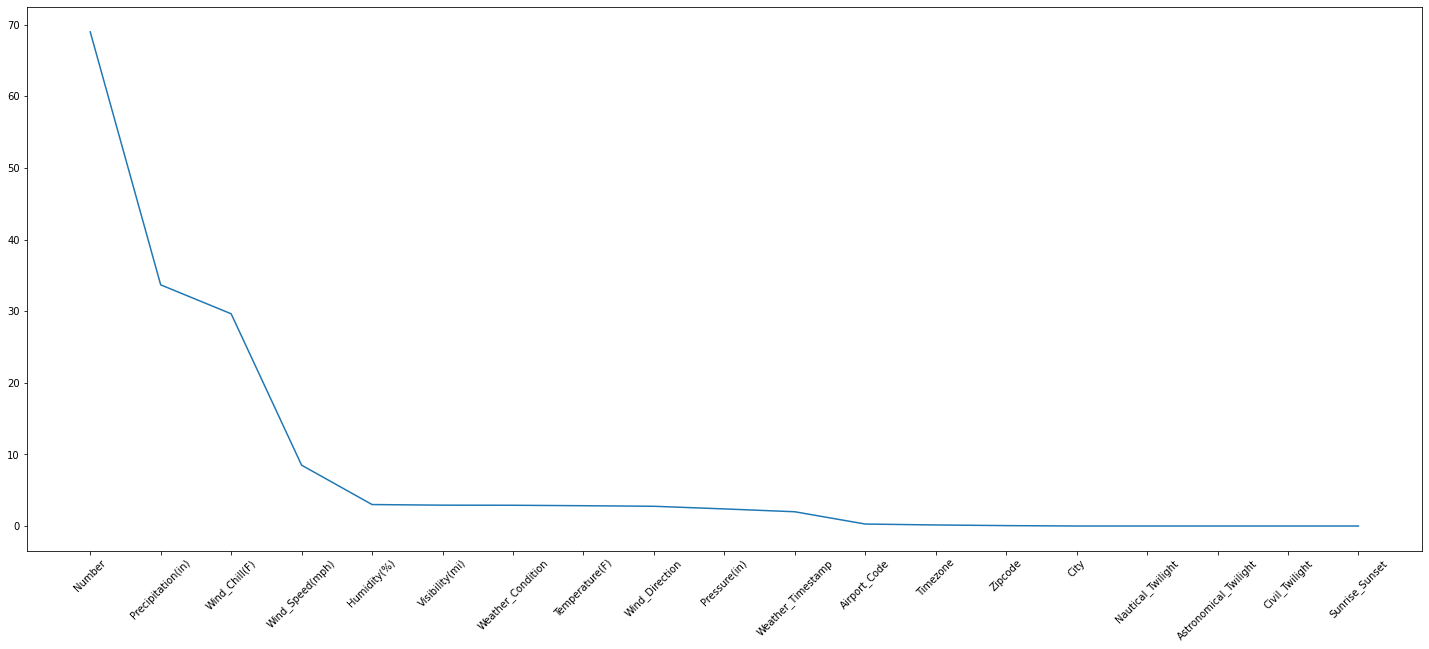

In [ ]:
miss_data = (df.isna().sum().sort_values(ascending=False))
miss_data_percent = (miss_data/len(df))*100
plt.figure(figsize=(25, 10))
plt.xticks(rotation=45)
plt.plot(miss_data_percent[miss_data_percent != 0])

#Exploratory Data Analysis
So now , we want to analyze this data and gain valuable insights from this data.Let's select some meaning columns.
- City
- Severity
-Temperature
- Weather Condition
- Visibility
- Distance

Let's deal with cities and the number of accidents that occufred in that particular city.

In [ ]:
city = df.City.unique()
city_count = len(city)
print("There are {} cities in this dataset".format(city_count))

There are 10658 cities in this dataset


These are a lot of cities so, let's look at the top 500 cities in this data.

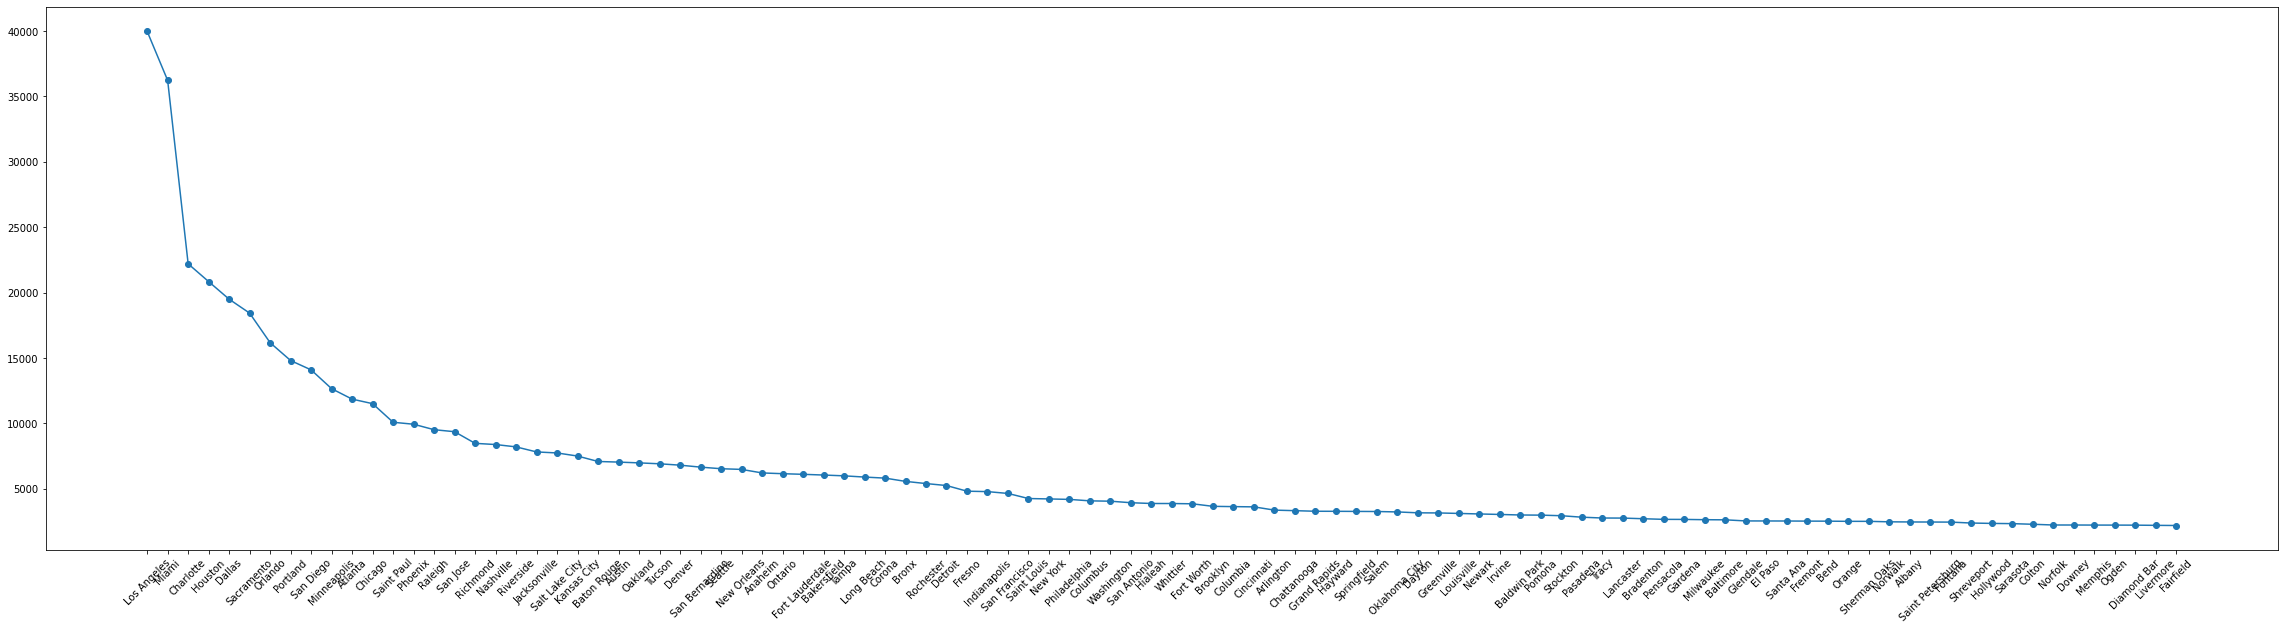

In [ ]:
city_counts =df.City.value_counts()
top_city = city_counts[:100]
plt.figure(figsize = (40, 10))
plt.xticks(rotation =45 )
plt.plot(top_city,marker='o')

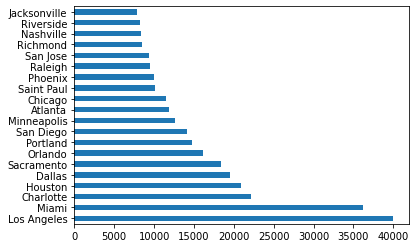

In [ ]:
city_counts[:20].plot(kind='barh')

## Most Dangerous Cities
Let's determine which cities contribute to the top 20% of the total accidents that take place in USA.

Dublin-2.64%
Dayton-2.39%
Cincinnati-1.46%
Cincinnati-1.37%
Akron-1.29%
Cincinnati-1.22%
Williamsburg-1.07%
Batavia-0.98%
Dayton-0.93%
Cleveland-0.83%
Lima-0.78%
Westerville-0.76%
Cincinnati-0.67%
Cincinnati-0.66%
Cleveland-0.63%
Jamestown-0.62%
Freeport-0.56%
Freeport-0.55%
Columbus-0.54%
Columbus-0.52%


([<matplotlib.patches.Wedge at 0x7f78107cbb10>,
 [Text(1.0109431923118681, 0.4335825895008811, 'Dublin'),
  Text(0.4215876270265427, 1.0160038743716133, 'Dayton'),
  Text(-0.21725381367713253, 1.0783324072115898, 'Cincinnati'),
  Text(-0.6524936723008729, 0.8855800402037759, 'Cincinnati'),
  Text(-0.9507348552019442, 0.5532659713954386, 'Akron'),
  Text(-1.0888185671191186, 0.15644209119245894, 'Cincinnati'),
  Text(-1.0763132041619208, -0.22704600094848523, 'Williamsburg'),
  Text(-0.9536369877464583, -0.5482485709984674, 'Batavia'),
  Text(-0.7548106131008935, -0.8001630698490486, 'Dayton'),
  Text(-0.5130743980444797, -0.9730131869976352, 'Cleveland'),
  Text(-0.2581819668991241, -1.0692717484195025, 'Lima'),
  Text(-0.00022302361515851905, -1.0999999773911213, 'Westerville'),
  Text(0.23852811469756893, -1.0738269592903802, 'Cincinnati'),
  Text(0.44996598156119827, -1.0037582455141614, 'Cincinnati'),
  Text(0.6378055120588716, -0.8962165635533192, 'Cleveland'),
  Text(0.7965668717

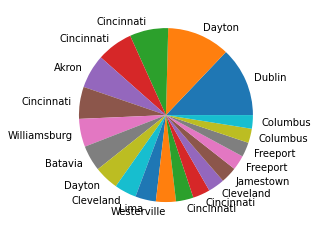

In [ ]:
city_counts =df.City.value_counts()
total_accidents = city_counts.sum()
sum = 0
pie_highest = []
city_high = []
r = np.arange(0,len(df))
for i in r:
  sum = sum + city_counts[i]
  print('{}-{:.2f}%'.format(df.City[i],(city_counts[i]/total_accidents)*100))
  pie_highest.append((city_counts[i]/total_accidents)*100)
  city_high.append(df.City[i])
  
  if (sum >= (total_accidents/5)):
    break
plt.pie(pie_highest,labels = city_high)

##Most prone time of accidents
Let's try to analyze at what time of the day have most accidents occurred.

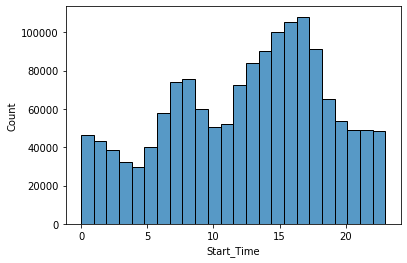

In [ ]:
df.Start_Time=pd.to_datetime(df.Start_Time)
sns.histplot(df.Start_Time.dt.hour, bins = 24)
  

It seems like most accidents occur during 7AM to 10AM & during 1PM to 8PM. The most logical explanation for hikebin accidents is because of traffic rush due to working people. Let's check if the trends are same on weekdays and weekends.

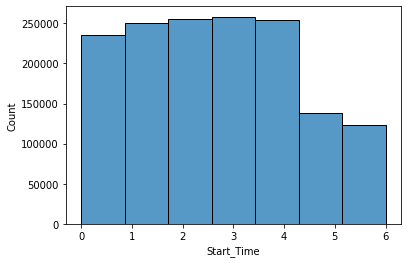

In [ ]:
df.Start_Time=pd.to_datetime(df.Start_Time)
sns.histplot(df.Start_Time.dt.dayofweek, bins = 7)

As we can see here, most number of accidents occur on weekdays which again supports our theory regarding working class.

##How does temperature & weather conditions affect the accidents?

In [ ]:
df = df.rename(columns={'Temperature(F)': 'Temperature'})
temp=df.Temperature.value_counts(bins=26,sort=False)


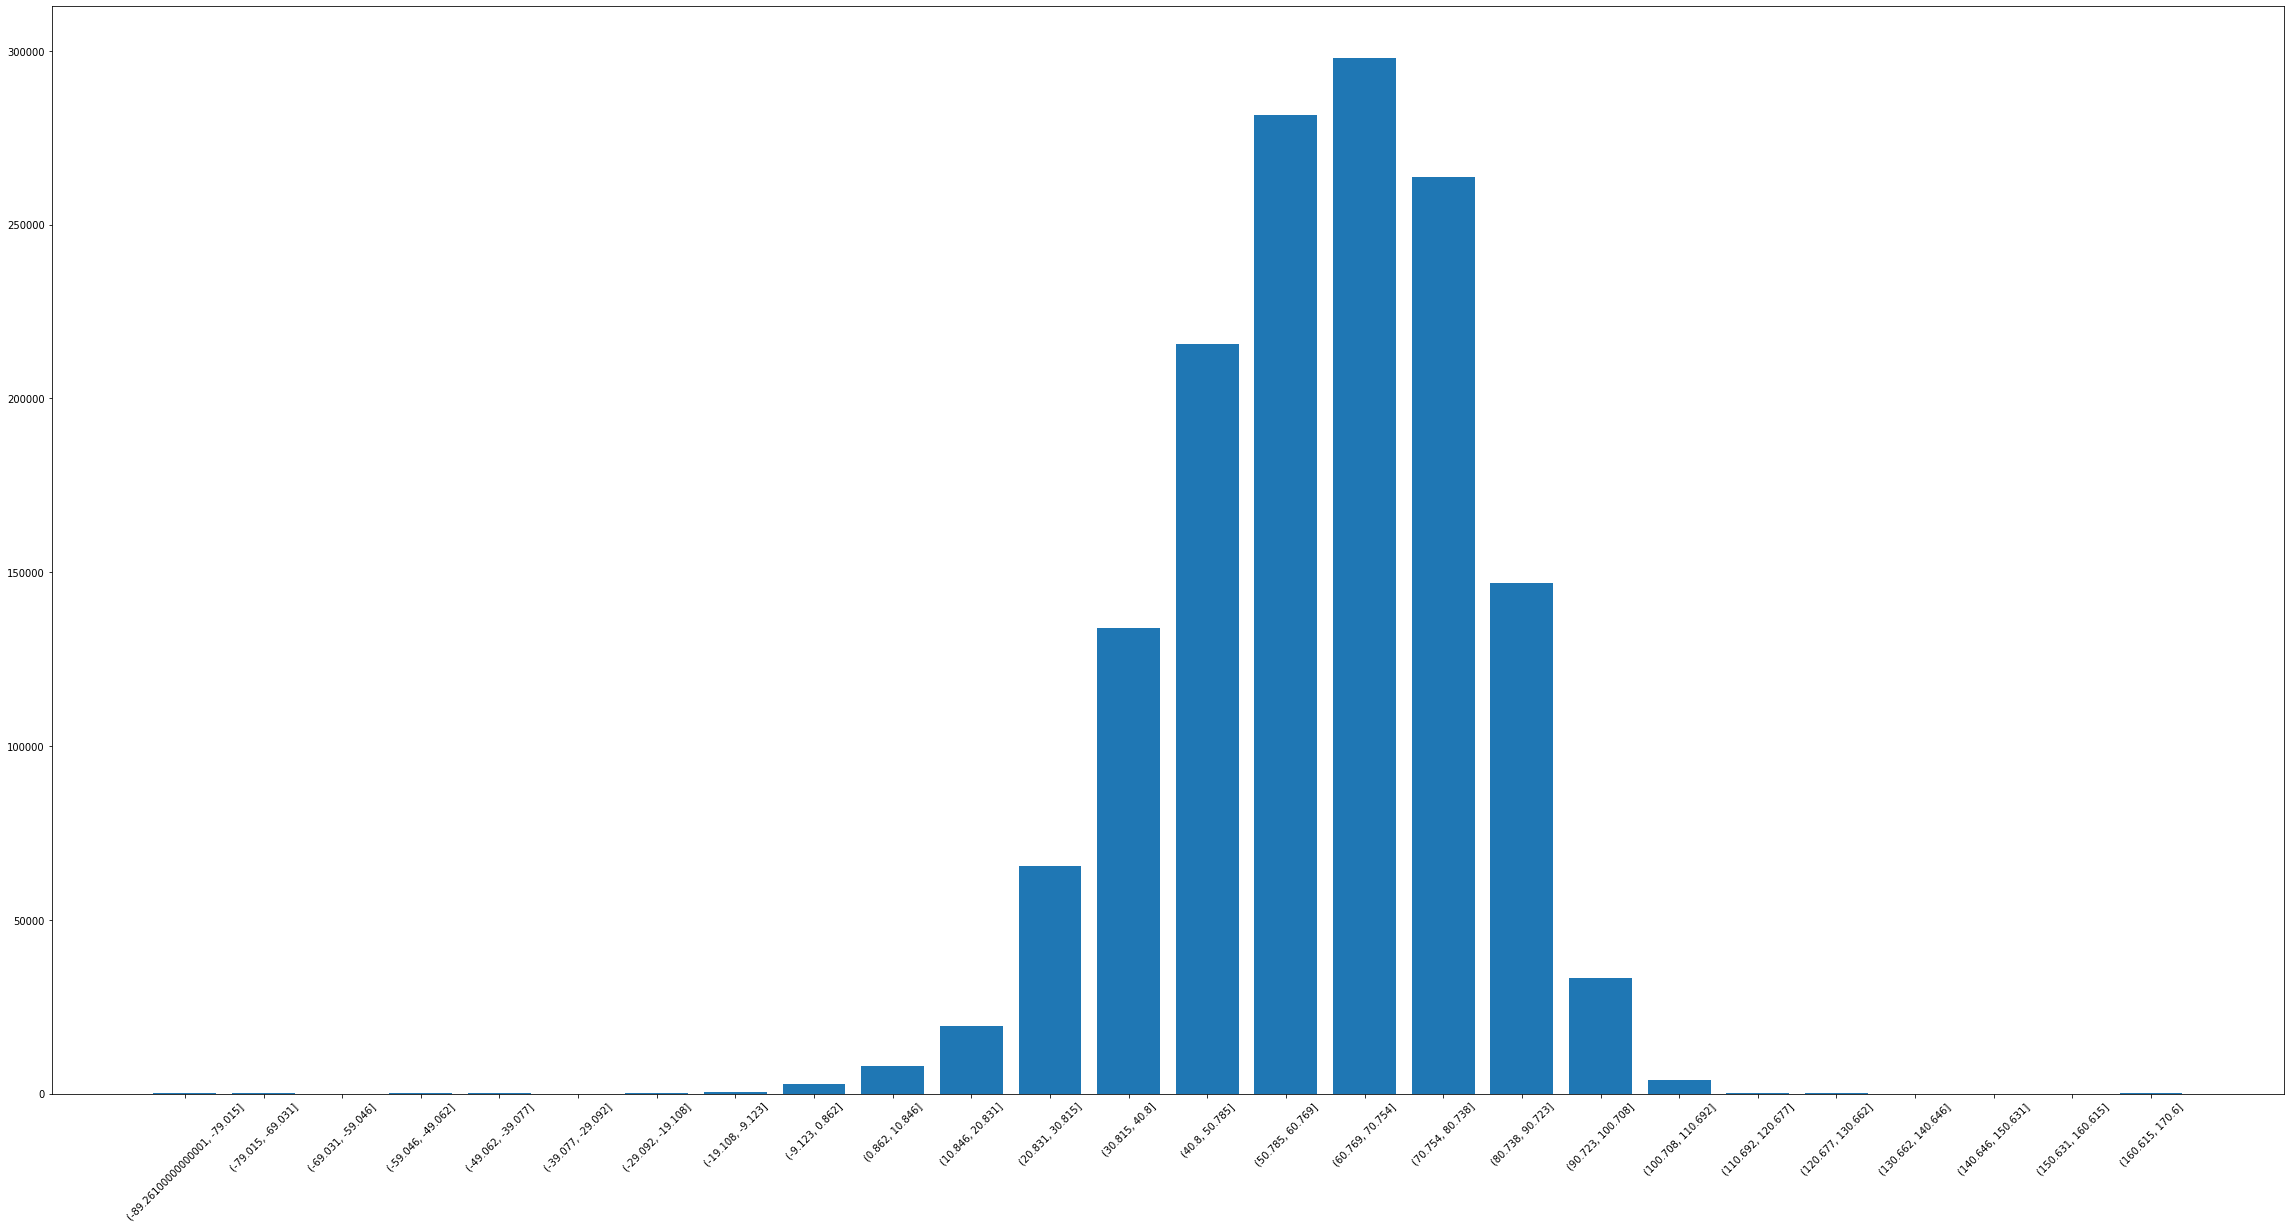

In [ ]:
temp_df = pd.DataFrame(temp)
temp_df=temp_df.reset_index()
temp_dff=temp_df.rename(columns={'index':'Temp_Range','Temperature':'Accidents'})
plt.figure(figsize = (40, 20))
plt.xticks(rotation =45 )
plt.bar(temp_dff.Temp_Range.astype(str),height=temp_dff.Accidents)
plt.show()

From the graph above we see that most of the accidents occur within thee temperature range of 40°F to 90°F which is a significantly cool weather.Let's see we can deduce a more meaningfil insight from the variation per month.

[Text(0, 0.5, 'Accidents'), Text(0.5, 0, 'Month')]

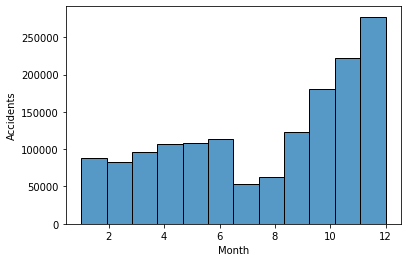

In [ ]:
df.Start_Time=pd.to_datetime(df.Start_Time)
fig=sns.histplot(df.Start_Time.dt.month,bins = 12)
months = df.Start_Time.dt.month
fig.set(ylabel='Accidents',xlabel='Month')

This shows that most of the accidents occur from October to December. This verifies our theory that winter season plays a mojor role in accidents. Maybe due to harsh weather conditions and low visibility,accidents are more.

##Severity of Accidents

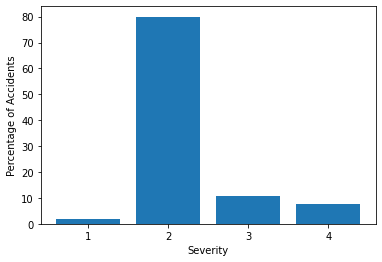

In [7]:
severity=df.Severity.value_counts(sort=False)
severe_df = pd.DataFrame(severity)
severe_df=severe_df.reset_index()
severe_dff=severe_df.rename(columns={'index':'Severity','Severity':'Accidents'})
plt.bar(severe_dff.Severity.astype(str),height=(severe_dff.Accidents*100)/severe_dff.Accidents.sum())
plt.xlabel('Severity')
plt.ylabel('Percentage of Accidents')
plt.show()

Here we clearly see that most of the accidents lie in medium severity range as compared to higher severity cases. 

##Future Analysis
1.We can combine another dataframe for each city's population and then calculate the number of accidents per head to determine where the density of popultion is highest.
2.